# Thu thập dữ liệu

In [ ]:
# import thư viện tự xây dựng
import sys
sys.path.append('./Code') # Đường dẫn thư mục chứa file code
from app import convert_utc
from app import crypto_line_chart

# Thư viện mặc định python
import time

# Thư viện crypto
import ccxt

# Thư viện xử lý dữ liệu
import pandas as pd

# Thư viện trực quan dữ liệu
import matplotlib.pyplot as plt


In [6]:
import ccxt

# Khởi tạo đối tượng sàn Bybit
exchange = ccxt.bybit()

# Lấy giá của ETH/USDT (hoặc ETH bất kỳ cặp giao dịch nào trên sàn)
symbol = 'ETH/USDT'
ticker = exchange.fetch_ticker(symbol)

# In giá hiện tại (last price)
print(f"Giá hiện tại của {symbol}: {ticker['last']}")


Giá hiện tại của ETH/USDT: 1595.86


In [2]:
import ccxt

# Khởi tạo đối tượng sàn Bybit
exchange = ccxt.bybit()

# Xem tài liệu giúp đỡ về phương thức fetch_ohlcv của sàn Bybit
help(exchange.fetch_ohlcv)


Help on method fetch_ohlcv in module ccxt.bybit:

fetch_ohlcv(
    symbol: str,
    timeframe='1m',
    since: Optional[int] = None,
    limit: Optional[int] = None,
    params={}
) -> List[list] method of ccxt.bybit.bybit instance
    fetches historical candlestick data containing the open, high, low, and close price, and the volume of a market

    https://bybit-exchange.github.io/docs/v5/market/kline
    https://bybit-exchange.github.io/docs/v5/market/mark-kline
    https://bybit-exchange.github.io/docs/v5/market/index-kline
    https://bybit-exchange.github.io/docs/v5/market/preimum-index-kline

    :param str symbol: unified symbol of the market to fetch OHLCV data for
    :param str timeframe: the length of time each candle represents
    :param int [since]: timestamp in ms of the earliest candle to fetch
    :param int [limit]: the maximum amount of candles to fetch
    :param dict [params]: extra parameters specific to the exchange API endpoint
    :param int [params.until]: th

In [ ]:
# Thiết lập
exchange = ccxt.bybit()
symbol = 'ETH/USDT'
timeframe = '15m'  # có thể đổi sang '1d', '5m', '1m', v.v.
limit = 1000
since = exchange.parse8601(convert_utc("01-01-2024"))
all_data = []

# Lặp để lấy dữ liệu
while True:
    # Lấy dữ liệu
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since, limit)

    if not ohlcv:
        break

    # Hiển thị khoảng thời gian
    # from_time = exchange.iso8601(since)
    # to_time = exchange.iso8601(ohlcv[-1][0])
    # print(f"Lấy dữ liệu từ: {from_time} - {to_time}")

    # from_time = pd.to_datetime(exchange.iso8601(since), utc=True).tz_convert('Asia/Ho_Chi_Minh')
    # to_time = pd.to_datetime(exchange.iso8601(ohlcv[-1][0]), utc=True).tz_convert('Asia/Ho_Chi_Minh')
    # print(f"Lấy dữ liệu từ: {from_time} - {to_time}")

    from_time = pd.to_datetime(exchange.iso8601(since), utc=True).tz_convert('Asia/Ho_Chi_Minh')
    to_time = pd.to_datetime(exchange.iso8601(ohlcv[-1][0]), utc=True).tz_convert('Asia/Ho_Chi_Minh')
    # Định dạng thời gian
    from_str = from_time.strftime("%H:%M:%S %d-%m-%Y")
    to_str = to_time.strftime("%H:%M:%S %d-%m-%Y")
    print(f"Lấy dữ liệu từ: {from_str} - {to_str}")

    all_data.extend(ohlcv)

    # Cập nhật 'since' để tiếp tục từ nến kế tiếp
    since = ohlcv[-1][0] + 1
    time.sleep(exchange.rateLimit / 1000)

# Chuyển thành DataFrame
df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
# df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', utc=True).dt.tz_convert('Asia/Ho_Chi_Minh') # Chuyển về UTC+7
# df['timestamp'] = df['timestamp'].dt.strftime("%H:%M:%S %d-%m-%Y")

# Xem dữ liệu
print(f"\nTổng số nến đã lấy: {len(df)}")


Lấy dữ liệu từ: 00:00:00 01-01-2024 - 09:45:00 11-01-2024
Lấy dữ liệu từ: 09:45:00 11-01-2024 - 19:30:00 21-01-2024
Lấy dữ liệu từ: 19:30:00 21-01-2024 - 05:15:00 01-02-2024
Lấy dữ liệu từ: 05:15:00 01-02-2024 - 15:00:00 11-02-2024
Lấy dữ liệu từ: 15:00:00 11-02-2024 - 00:45:00 22-02-2024
Lấy dữ liệu từ: 00:45:00 22-02-2024 - 10:30:00 03-03-2024
Lấy dữ liệu từ: 10:30:00 03-03-2024 - 20:15:00 13-03-2024
Lấy dữ liệu từ: 20:15:00 13-03-2024 - 06:00:00 24-03-2024
Lấy dữ liệu từ: 06:00:00 24-03-2024 - 15:45:00 03-04-2024
Lấy dữ liệu từ: 15:45:00 03-04-2024 - 01:30:00 14-04-2024
Lấy dữ liệu từ: 01:30:00 14-04-2024 - 11:15:00 24-04-2024
Lấy dữ liệu từ: 11:15:00 24-04-2024 - 21:00:00 04-05-2024
Lấy dữ liệu từ: 21:00:00 04-05-2024 - 06:45:00 15-05-2024
Lấy dữ liệu từ: 06:45:00 15-05-2024 - 16:30:00 25-05-2024
Lấy dữ liệu từ: 16:30:00 25-05-2024 - 02:15:00 05-06-2024
Lấy dữ liệu từ: 02:15:00 05-06-2024 - 12:00:00 15-06-2024
Lấy dữ liệu từ: 12:00:00 15-06-2024 - 21:45:00 25-06-2024
Lấy dữ liệu từ

In [24]:
df.tail()

,timestamp,open,high,low,close,volume
45497,2025-04-18 22:15:00+07:00,1583.19,1586.67,1580.40,1581.43,1372.39131
45498,2025-04-18 22:30:00+07:00,1581.43,1583.19,1579.69,1580.31,741.67980
45499,2025-04-18 22:45:00+07:00,1580.31,1583.45,1579.79,1583.06,475.35593
45500,2025-04-18 23:00:00+07:00,1583.06,1585.91,1581.66,1585.09,479.40517
45501,2025-04-18 23:15:00+07:00,1585.09,1585.54,1585.09,1585.54,2.37086


In [27]:
help(crypto_line_chart)

Help on function crypto_line_chart in module app:

crypto_line_chart(df, symbol, x_col='timestamp', y_col='close', figsize=(12, 6))
    Vẽ biểu đồ đường thể hiện giá theo thời gian.

    Tham số:
    - df: DataFrame chứa dữ liệu.
    - symbol: Tên mã (ví dụ BTC, ETH...).
    - x_col: Tên cột trục x (mặc định là "timestamp").
    - y_col: Tên cột trục y (mặc định là "close").
    - figsize: Kích thước biểu đồ (mặc định là (12, 6)).



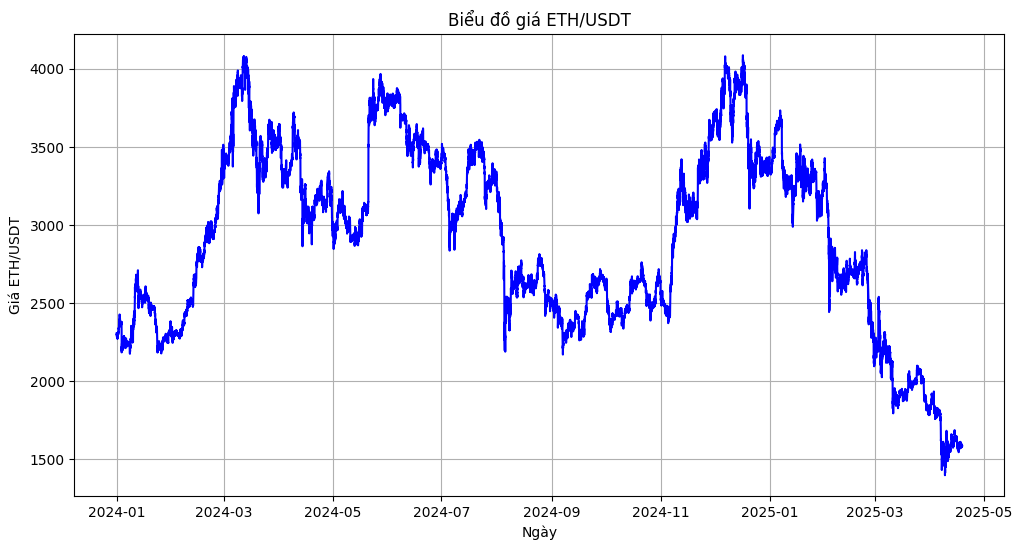

In [28]:
crypto_line_chart(df, symbol)

In [14]:
# Thiết lập
exchange = ccxt.bybit()
symbol = 'BTC/USDT'
timeframe = '15m'  # có thể đổi sang '1d', '5m', '1m', v.v.
limit = 1000
since = exchange.parse8601(convert_utc("01-01-2024"))
all_data = []

# Lặp để lấy dữ liệu
while True:
    # Lấy dữ liệu
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since, limit)

    if not ohlcv:
        break

    # Hiển thị khoảng thời gian
    from_time = exchange.iso8601(since)
    to_time = exchange.iso8601(ohlcv[-1][0])
    print(f"Lấy dữ liệu từ: {from_time} - {to_time}")

    all_data.extend(ohlcv)

    # Cập nhật 'since' để tiếp tục từ nến kế tiếp
    since = ohlcv[-1][0] + 1
    time.sleep(exchange.rateLimit / 1000)

# Chuyển thành DataFrame
df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
# df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', utc=True).dt.tz_convert('Asia/Ho_Chi_Minh') # Chuyển về UTC+7

# Xem dữ liệu
print(f"\nTổng số nến đã lấy: {len(df)}")


Lấy dữ liệu từ: 2023-12-31T17:00:00.000Z - 2024-01-11T02:45:00.000Z
Lấy dữ liệu từ: 2024-01-11T02:45:00.001Z - 2024-01-21T12:30:00.000Z
Lấy dữ liệu từ: 2024-01-21T12:30:00.001Z - 2024-01-31T22:15:00.000Z
Lấy dữ liệu từ: 2024-01-31T22:15:00.001Z - 2024-02-11T08:00:00.000Z
Lấy dữ liệu từ: 2024-02-11T08:00:00.001Z - 2024-02-21T17:45:00.000Z
Lấy dữ liệu từ: 2024-02-21T17:45:00.001Z - 2024-03-03T03:30:00.000Z
Lấy dữ liệu từ: 2024-03-03T03:30:00.001Z - 2024-03-13T13:15:00.000Z
Lấy dữ liệu từ: 2024-03-13T13:15:00.001Z - 2024-03-23T23:00:00.000Z
Lấy dữ liệu từ: 2024-03-23T23:00:00.001Z - 2024-04-03T08:45:00.000Z
Lấy dữ liệu từ: 2024-04-03T08:45:00.001Z - 2024-04-13T18:30:00.000Z
Lấy dữ liệu từ: 2024-04-13T18:30:00.001Z - 2024-04-24T04:15:00.000Z
Lấy dữ liệu từ: 2024-04-24T04:15:00.001Z - 2024-05-04T14:00:00.000Z
Lấy dữ liệu từ: 2024-05-04T14:00:00.001Z - 2024-05-14T23:45:00.000Z
Lấy dữ liệu từ: 2024-05-14T23:45:00.001Z - 2024-05-25T09:30:00.000Z
Lấy dữ liệu từ: 2024-05-25T09:30:00.001Z - 2024-

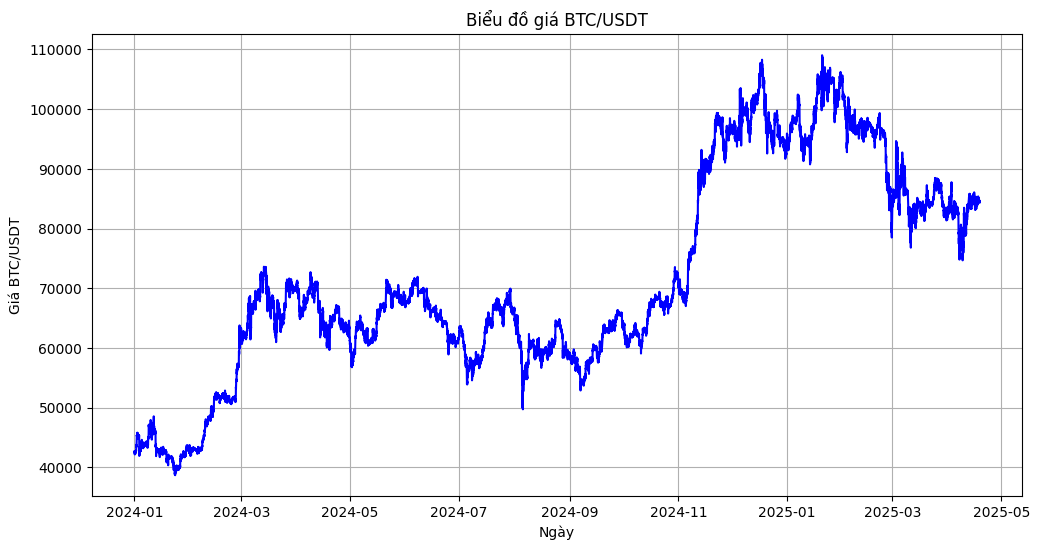

In [15]:
crypto_line_chart(df, symbol)